In [ ]:
!pip install matplotlib

In [ ]:
import os
from os import path
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#Читаем файл
df = pd.read_csv("../data/Total annual rainfall in inches London England 1813  1912.csv")
df = df['x']
df.describe()

count    100.000000
mean      24.823900
std        4.214531
min       16.930000
25%       22.202500
50%       23.870000
75%       27.510000
max       38.100000
Name: x, dtype: float64

In [12]:
df.head()

0    23.56
1    26.07
2    21.86
3    31.24
4    23.65
Name: x, dtype: float64

<Axes: >

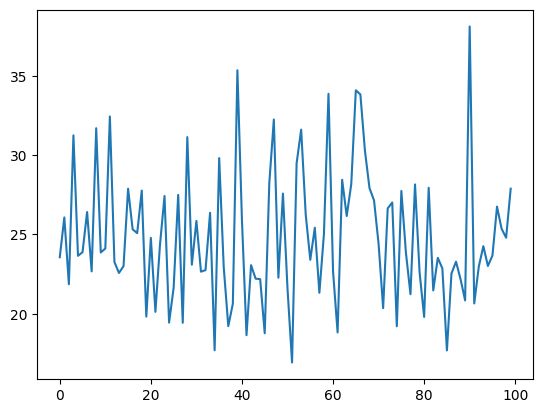

In [13]:
df.plot()

Тест Дики-Фуллера - проверка на стационарность

In [15]:
# Импортируем функцию для проведения теста Дики-Фуллера
from statsmodels.tsa.stattools import adfuller

alpha = 0.05
name = "Снегопад"
ts = df

print(f'Тест Дики-Фуллера ряда {name} :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда Снегопад :
Test Statistic                -1.050200e+01
p-value                        1.078001e-18
#Lags Used                     0.000000e+00
Number of Observations Used    9.900000e+01
Critical Value (1%)           -3.498198e+00
Critical Value (5%)           -2.891208e+00
Critical Value (10%)          -2.582596e+00
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


Выполним сезонное разложение временного ряда - получим тренд, сезонность и остаток

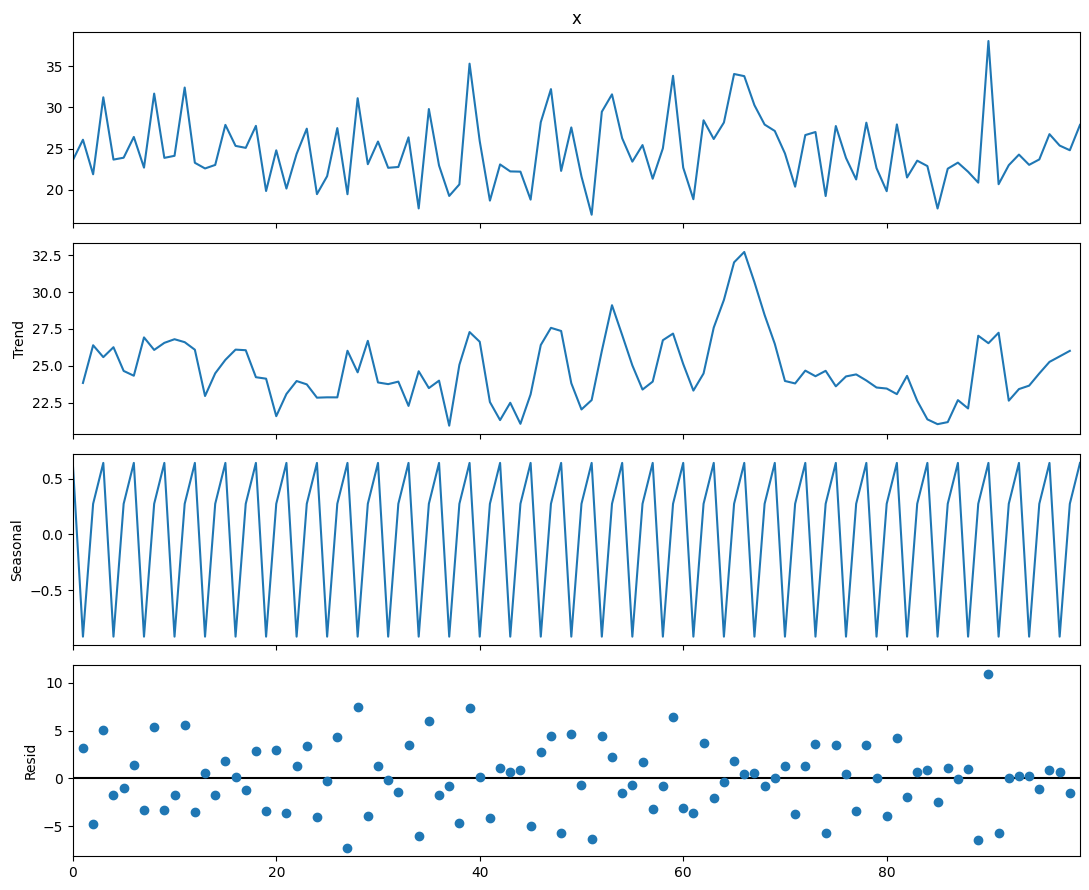

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
decompose = seasonal_decompose(df,
                               period=3)
decompose.plot()
plt.show()

Получим Аддитивный временной ряд

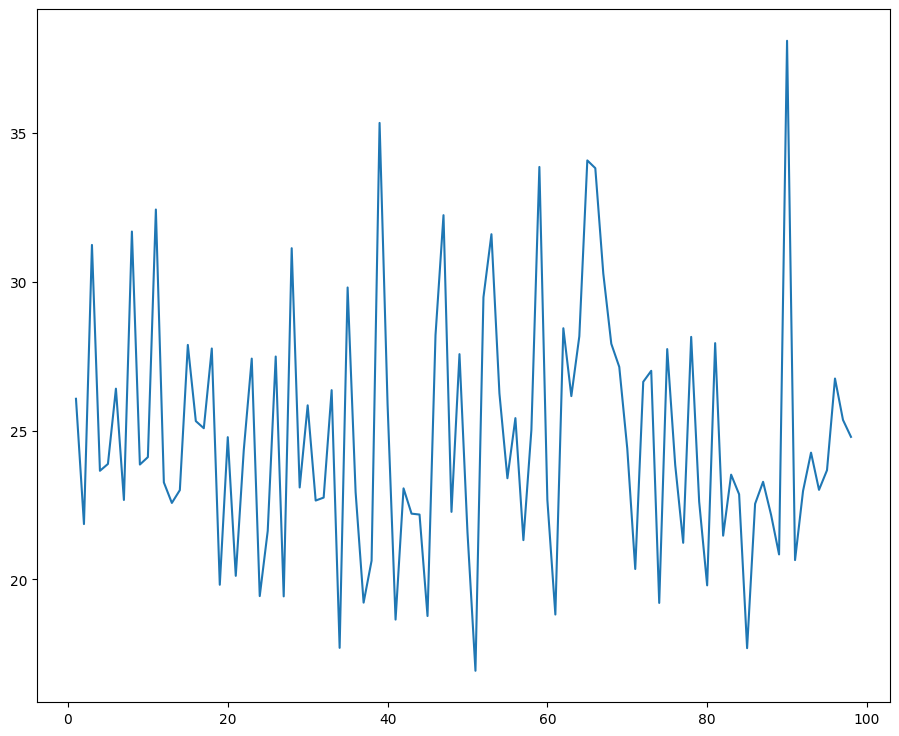

In [17]:
additive = decompose.trend + decompose.seasonal + decompose.resid
additive.plot()
plt.show()

Получим мультипликативный ряд

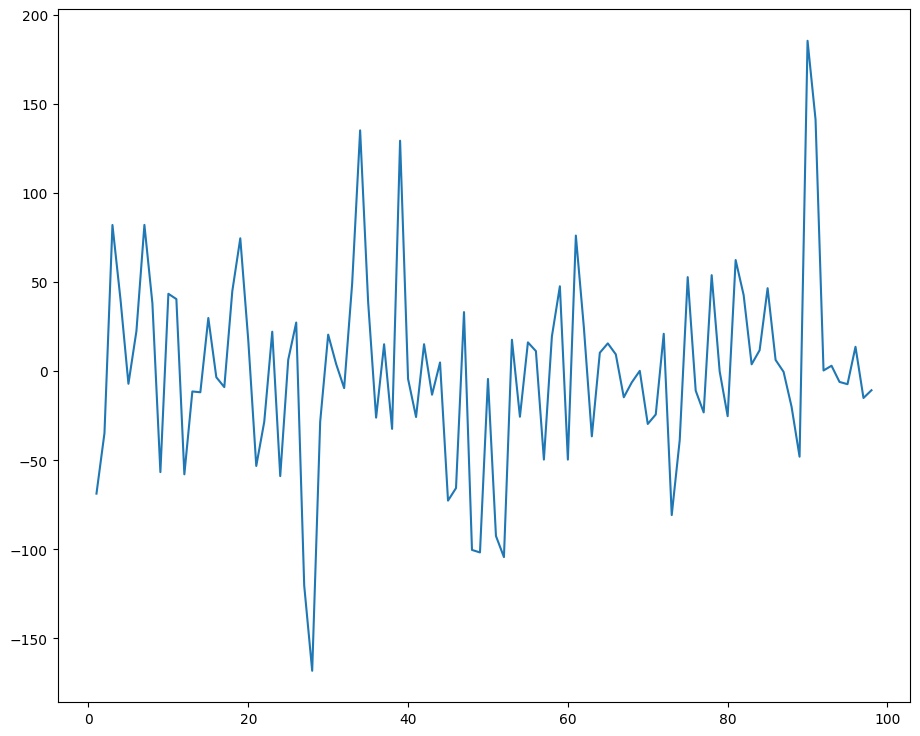

In [18]:
multiplicative = decompose.trend * decompose.seasonal * decompose.resid
multiplicative.plot()
plt.show()

Аддитивный и мультипликативный ряды напоминают исходный ряд

Автокорреляция и частичная автокорелляция

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

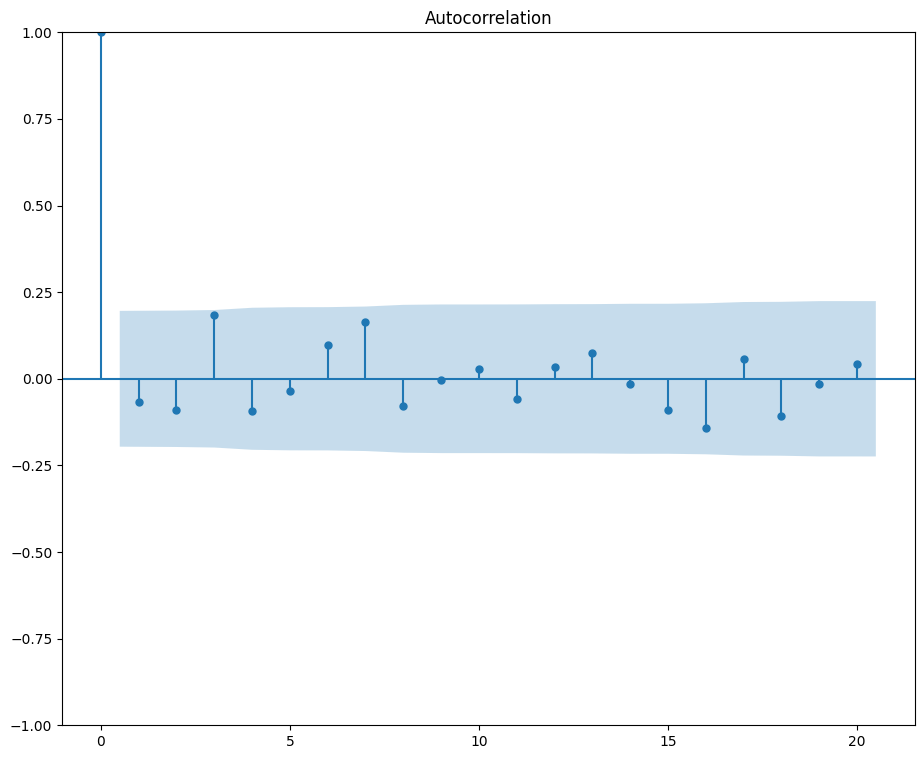

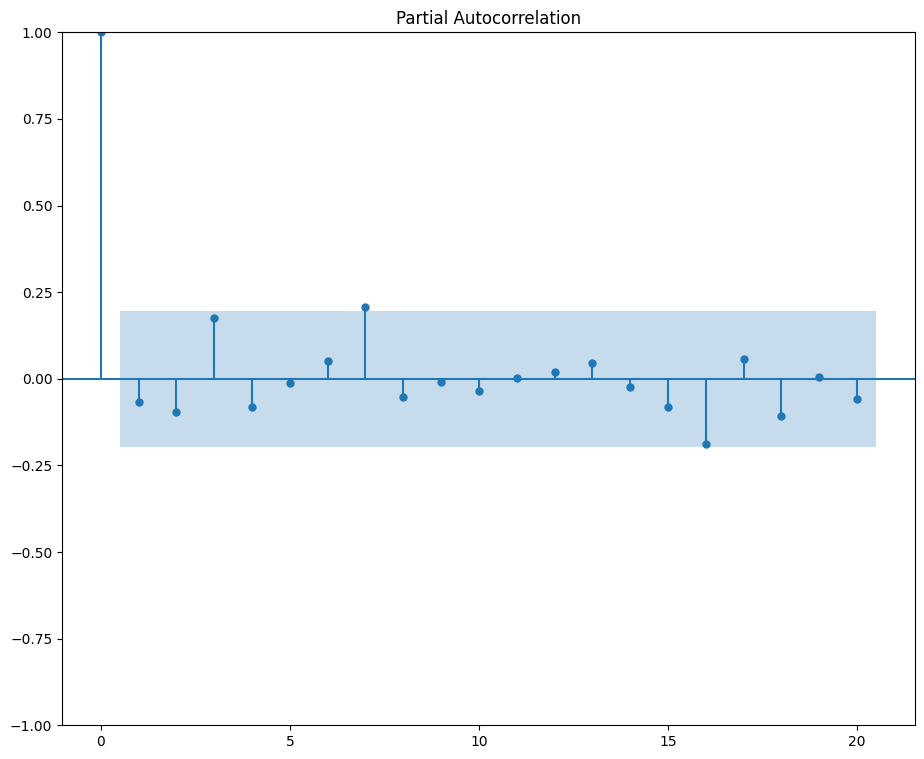

In [21]:
# Автокорреляция
plot_acf(df)
plt.show()


# Частичная автокорреляция
plot_pacf(df)
plt.show()